## Pymaceuticals, Inc.


- The Capomulin regimen appears to be the most effective regimen overall based on the final tumor volume analysis.  It has comparable results to Ramicane as demonstrated in the box plot below.  However, it demonstrated significantly better results than Infubinol and Ceftamin, as their final tumor volumes were significantly higher (with one potential low outlier in the Infubinol group).  

    - These results may be affected by the number of mice tested by 
    regimen, as the bar plot demonstrates that a larger number of mice
    were tested under the Capomulin and Ramicane regimens, especially
    in comparison with Infubinol and Ceftamin
    
- As noted above, the analysis only identified one potential outlier in the group of mice tested under the Infubinol regimen, suggesting consistent results across all the drug regimens.  

- As demonstrated in the scatter plot below, as the weight of the mouse increased, the average tumor volume also increased.  This may be a reflection of a drop in effectiveness of the drug regimen in mice of a higher weight, or simply a reflection of statistically higher tumor volume as the mouse's weight increases.  This is further demonstrated by the .84 correlation between mouse weight and average tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview - 1893 rows
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Displaying results for each Mouse ID.  g989 shows 13 results, more than any other.  
# This suggests it may be the duplicate
combined_df['Mouse ID'].value_counts()

# Determine which Mouse ID contains a duplicate.  Confirming g989 is the duplicate ID
combined_df[combined_df.duplicated()]
                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_df.loc[(combined_df["Mouse ID"] == 'g989')]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Check the number of mice in the clean DataFrame.
new_mouse_count = len(clean_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_vol = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_vol = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"] 
sem_vol = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_sum_df = pd.DataFrame({"Mean Tumor Volume": mean_vol,
                           "Median Tumor Volume": median_vol,
                           "Tumor Volume Variance": variance_vol,
                           "Tumor Volume Std. Dev.": std_dev_vol,
                           "Tumor Volume Std. Err.":sem_vol})
drug_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

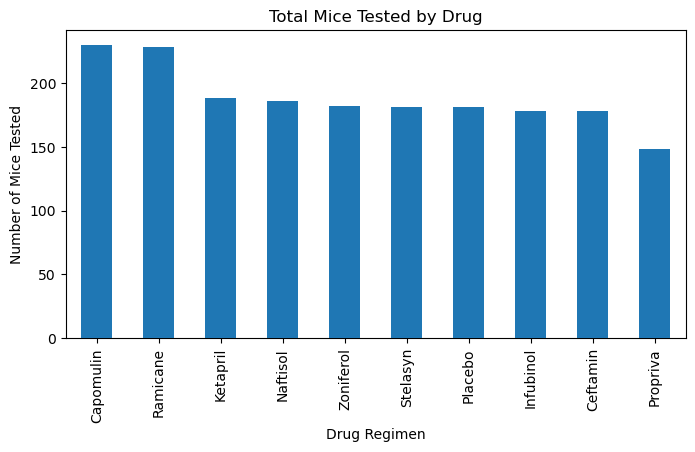

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Calculate the number of timepoints per drug
timepoints = clean_df['Drug Regimen'].value_counts()

# Generate bar plot with title and labels
timepoints.plot(kind='bar', figsize=(8,4), zorder=3)
plt.title("Total Mice Tested by Drug")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

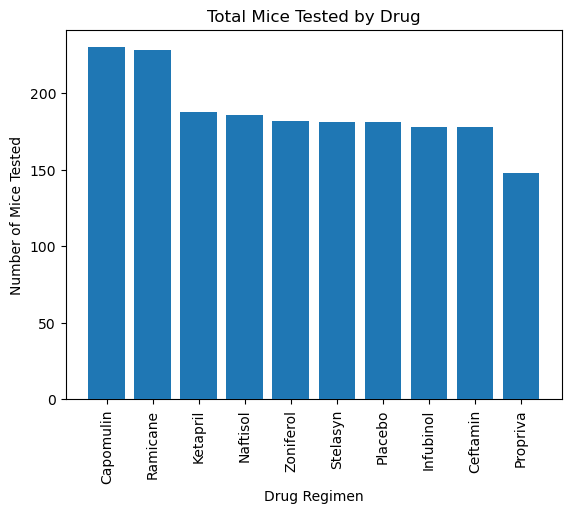

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = clean_df['Drug Regimen'].value_counts()

# Set x-axis to number of timepoints
x_axis = np.arange(len(timepoints))

# Generate the bar plot with the provided data
plt.bar(x_axis, timepoints, zorder = 3)

# Label x-axis tickmarks according to drug names
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints.index.values)

# Rotate tick marks for legibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Mice Tested by Drug")

# Display generated plot
plt.show()


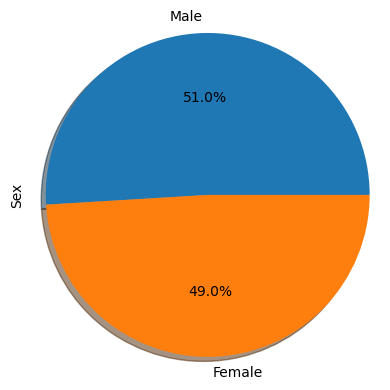

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate number of each gender
mice_gender = clean_df['Sex'].value_counts()
# Plot pie chart using this data and set format parameters
mice_gender.plot(kind='pie', shadow=True, figsize=(4,4), autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.show()

In [12]:
mice_gender

Male      958
Female    922
Name: Sex, dtype: int64

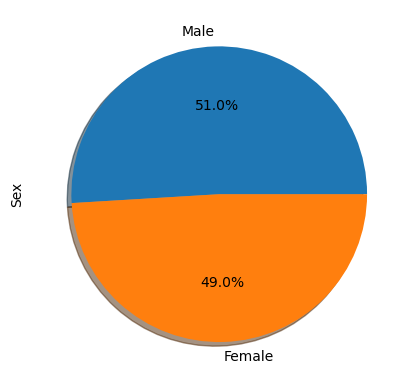

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Set variables from data and complete formatting, plot pie chart
labels = ["Male", "Female"]
numbers = ["958", "922"]
plt.pie(mice_gender, labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers, and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin                         
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
greatest_tp

# Merge this group dataframe with the original to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, greatest_tp, on='Mouse ID')
merged_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]

    # Add subset dataframe that selects only the maximum timepoint for each drug
    final_vol = drug_df.loc[drug_df['Timepoint'] == drug_df['Max Timepoint']]
    
    # Create list containing all final tumor volume values for each drug
    values = final_vol['Tumor Volume (mm3)']
    tum_vol.append(values)
        
    # Calculate and print IQR for each drug regimen
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Check for outliers
    outliers = values.loc[(final_vol['Tumor Volume (mm3)'] > upper_bound) | 
                          (final_vol['Tumor Volume (mm3)'] < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    
  
   

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


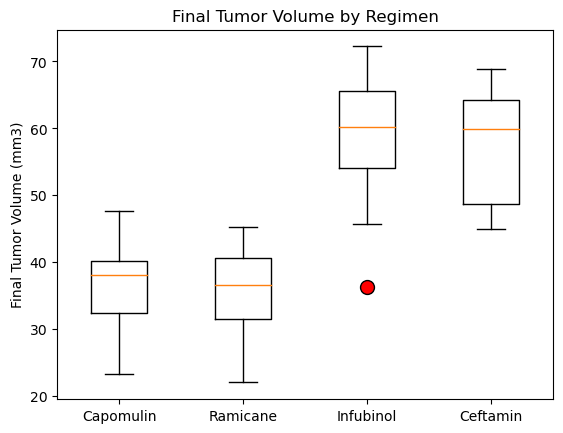

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Format outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

# Create boxplot
plt.boxplot(tum_vol, flierprops=flierprops)

# Add title and labels
plt.title("Final Tumor Volume by Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], treatments)
           
# Display boxplot
plt.show()

## Line and Scatter Plots

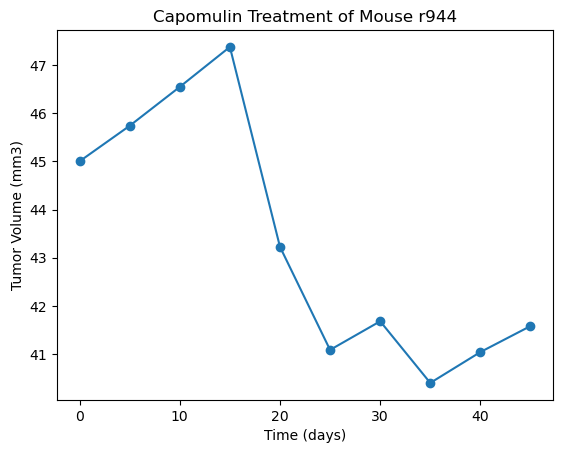

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points for treatments with Capomulin (Mouse ID r944 chosen from original dataframe)
mouse = clean_df.loc[clean_df['Mouse ID'] == 'r944']

# Plot line chart with time values on x-axis and tumor volume on y-axis
# Add circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse r944")

# Display plot
plt.show()

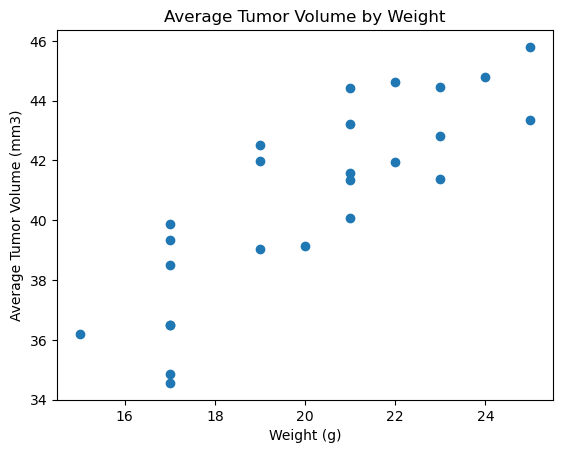

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Obtain info for cases only using Capomulin regiment
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto original dataframe and drop duplicates
avg_vol = pd.merge(capomulin, avg_vol, on='Mouse ID')
final_avg = avg_vol[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg

x = final_avg['Weight (g)']
y = final_avg['Average Tumor Volume']

# Create scatter plot with new dataframe
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

# Display plot
plt.show()

The correlation between mouse weight and average tumor volume on the Capomulin regimen is 0.84.


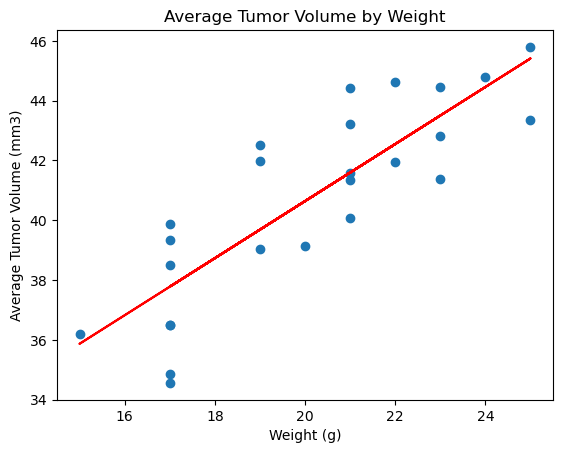

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Utilize same coding for scatter plot above
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_vol = pd.merge(capomulin, avg_vol, on='Mouse ID')
final_avg = avg_vol[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg
x = final_avg['Weight (g)']
y = final_avg['Average Tumor Volume']

# Calculate correlation coefficient between weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print above calculation
print(f"The correlation between mouse weight and average tumor volume on the Capomulin regimen is {round(correlation[0], 2)}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
